# Analiza ponašanja kupaca u web-trgovini

Jakov Kordić  
Informacijski sustavi / Programiranje za analizu podataka  
3. godina
Mentori:
Doc. dr. sc. Marcel Maretić,
Prof. dr. sc. Markus Schatten

19.1.2026.

## 1. Uvod

### 1.1 Motivacija i kontekst problema

U suvremenom poslovnom okruženju donošenje odluka sve se više temelji na analizi podataka. Organizacije koje raspolažu velikim količinama transakcijskih podataka, poput podataka o kupcima, narudžbama i proizvodima, imaju značajnu prednost ako te podatke mogu učinkovito analizirati i interpretirati. Posebno u području maloprodaje i e-trgovine, analiza prodajnih podataka omogućuje bolje razumijevanje ponašanja kupaca, identifikaciju najprofitabilnijih proizvoda te optimizaciju poslovnih procesa.

Motivacija za izradu ovog rada proizlazi iz potrebe za praktičnom demonstracijom obrade i analize stvarnih prodajnih podataka korištenjem alata za znanstveno računarstvo. Umjesto teorijskog pristupa, naglasak je stavljen na cjelovit proces rada s podacima, od učitavanja i pripreme podataka, preko njihove obrade i analize, do vizualne interpretacije dobivenih rezultata.

### 1.2 Cilj rada

Cilj ovog rada je implementirati sustav za analizu prodajnih podataka korištenjem programskog jezika Python i pripadajućih biblioteka za obradu i vizualizaciju podataka. Sustav treba omogućiti:

* objedinjavanje podataka iz više izvora,

* analizu prodaje po kupcima i proizvodima,

* izračun osnovnih poslovnih pokazatelja,

* vizualni prikaz ključnih rezultata analize.

* Kroz rad se nastoji pokazati kako se relativno jednostavnim alatima može dobiti vrijedan uvid u poslovne podatke.

### 1.3 Struktura rada

Rad je strukturiran na sljedeći način. U drugom poglavlju opisana je arhitektura sustava te korištene tehnologije i postupci obrade podataka. Treće poglavlje prikazuje način rada implementirane aplikacije i dobivene rezultate. U četvrtom poglavlju dan je kritički osvrt na prednosti i ograničenja rješenja, kao i prijedlozi za buduća poboljšanja. Na kraju rada iznesen je zaključak te popis korištene literature.

## 2. Opis implementacije sustava

### 2.1 Arhitektura sustava

Implementirani sustav temelji se na analizi statičkih generiranih CSV datoteka i stvarne JSON datoteke koje sadrže podatke o kupcima, narudžbama i stavkama narudžbi. Sustav je koncipiran kao sekvencijalni analitički proces koji se sastoji od sljedećih faza:

1. učitavanje podataka iz datoteka,

2. objedinjavanje i povezivanje tablica,

3. obrada i agregacija podataka,

4. analiza i izračun ključnih metrika,

5. vizualizacija rezultata.

Cjelokupna implementacija izvedena je u Jupyter Notebook okruženju, što omogućuje jasno razdvajanje objašnjenja i programskog koda te olakšava interpretaciju rezultata.

### 2.2 Korištene tehnologije i alati

Za izradu sustava korišten je programski jezik Python uz pripadajuće alate i biblioteke za prikupljanje, obradu i analizu podataka. Razvoj i izvođenje koda provedeni su u okruženju Jupyter Notebook, koje omogućuje interaktivan rad te istovremeno dokumentiranje postupaka i rezultata analize.

U radu su korištene sljedeće tehnologije, biblioteke i alati:

- **Python** – osnovni programski jezik korišten za implementaciju cjelokupnog sustava i obradu podataka,
- **Jupyter Notebook** – interaktivno razvojno okruženje za razvoj, testiranje i dokumentiranje analitičkog procesa,
- **Pandas** – biblioteka za učitavanje, manipulaciju, čišćenje i agregaciju podataka iz CSV i JSON formata,
- **Matplotlib** – biblioteka za izradu grafičkih prikaza i vizualnu interpretaciju rezultata analize,
- **Requests** – biblioteka za slanje HTTP zahtjeva i dohvat podataka putem vanjskih API-ja,
- **GenerateData** – online alat za generiranje sintetičkih podataka, korišten za izradu realističnih skupova podataka o kupcima, narudžbama i stavkama narudžbi u CSV formatu,
- **Open Food Facts API** – javno dostupni API korišten za dohvat stvarnih podataka o proizvodima i njihovim kategorijama u JSON formatu.

Navedeni alati omogućuju rad s heterogenim izvorima podataka, kombiniranje sintetičkih i stvarnih skupova podataka te provođenje cjelovitog procesa analize prodajnih podataka, od prikupljanja do vizualne interpretacije rezultata.


## 2.3 Priprema i obrada podataka
U ovoj fazi rada provedena je inicijalna priprema i čišćenje podataka. Obrada uključuje uklanjanje duplikata, standardizaciju tekstualnih vrijednosti, provjeru nedostajućih podataka te izvođenje osnovnih validacijskih provjera nad svakim skupom podataka.

U analizi su korištena dva tipa izvora podataka: sintetički generirani podaci o poslovanju web-trgovine (kupci, narudžbe i stavke narudžbi) te stvarni podaci o proizvodima i kategorijama preuzeti iz javno dostupnog skupa podataka. Kombiniranjem ova dva izvora omogućena je analiza prodaje na realističnim proizvodima, uz zadržavanje potpune kontrole nad transakcijskim dijelom podataka.

Sintetički transakcijski podaci generirani su pomoću alata GenerateData te su preuzeti u CSV formatu. Ovi podaci obuhvaćaju:

* tablicu kupaca (customers.csv),

* tablicu narudžbi (orders.csv),

* tablice stavki narudžbi podijeljene u više datoteka (order_items1.csv, order_items2.csv, order_items3.csv).

Budući da su stavke narudžbi raspodijeljene u više CSV datoteka, prije analize bilo ih je potrebno objediniti u jedinstvenu tablicu. Objedinjavanje je provedeno konkatenacijom uz ponovno indeksiranje, čime se osigurava konzistentan i kontinuiran indeks zapisa. Nakon učitavanja provjerene su dimenzije tablica kako bi se potvrdilo da su podaci uspješno učitani te da je proces spajanja izveden ispravno.

Uz transakcijske podatke, za podatke o proizvodima korišten je skup podataka Open Food Facts, koji je dostupan u JSON formatu i sadrži stvarne informacije o prehrambenim proizvodima, uključujući nazive proizvoda i njihove kategorije. JSON format zahtijeva dodatnu obradu u odnosu na CSV, uključujući učitavanje strukturiranih zapisa, odabir relevantnih atributa te eventualno čišćenje (npr. filtriranje zapisa bez naziva ili kategorije). Nakon izdvajanja potrebnih polja, podaci o proizvodima pripremaju se za spajanje s transakcijskim dijelom sustava, čime se omogućuje analiza prodaje po kategorijama proizvoda.

Na kraju ove faze dobiva se konzistentan skup podataka spreman za daljnju obradu, agregaciju i izračun poslovnih metrika u nastavku rada.

#### 2.3.1 Učitavanje i objedinjavanje transakcijskih podataka
U ovom dijelu koda provodi se učitavanje transakcijskih podataka iz CSV datoteka koje
sadrže informacije o kupcima, narudžbama i stavkama narudžbi. Podaci o kupcima i
narudžbama učitavaju se iz pojedinačnih datoteka, dok su stavke narudžbi raspodijeljene
u više CSV datoteka koje je potrebno objediniti.

Stavke narudžbi spajaju se u jedinstvenu tablicu korištenjem konkatenacije uz ponovno
indeksiranje zapisa, čime se osigurava konzistentna struktura podataka za daljnju
analizu. Nakon učitavanja, ispisom dimenzija tablica provjerava se uspješnost učitavanja
podataka te osnovna struktura svakog skupa podataka.


In [1]:
import pandas as pd

customers = pd.read_csv("customers.csv")

orders = pd.read_csv("orders.csv")

order_items_1 = pd.read_csv("order_items1.csv")
order_items_2 = pd.read_csv("order_items2.csv")
order_items_3 = pd.read_csv("order_items3.csv")
order_items = pd.concat(
    [order_items_1, order_items_2, order_items_3],
    ignore_index=True
)

print("Kupci:", customers.shape)
print("Narudžbe:", orders.shape)
print("Stavke narudžbi:", order_items.shape)


Kupci: (200, 6)
Narudžbe: (500, 4)
Stavke narudžbi: (1500, 5)


**Objašnjenje rezultata:**  
Ispis dimenzija tablica pokazuje da je učitano 200 zapisa o kupcima, 500 zapisa o
narudžbama te ukupno 1500 stavki narudžbi, što potvrđuje da su sve CSV datoteke
uspješno učitane i objedinjene.
#### 2.3.2 Učitavanje podataka o proizvodima iz JSON datoteke
U ovom dijelu koda učitavaju se podaci o proizvodima iz JSON datoteke preuzete iz
Open Food Facts skupa podataka. Budući da je JSON strukturiran u obliku zapisa po
retcima, učitavanje se provodi uz postavku koja omogućuje obradu takvog formata.
Nakon učitavanja provjerava se dimenzija tablice te popis dostupnih atributa kako
bi se stekao uvid u strukturu i opseg podataka.

In [2]:
products = pd.read_json("prvih_par.json", lines=True)
print("Proizvodi:", products.shape)
products.columns

Proizvodi: (489, 358)


Index(['_id', 'lc', 'correctors_tags', 'data_sources_tags',
       'data_quality_errors_tags', 'countries_hierarchy', 'categories_tags',
       'rev', 'categories_old', 'unknown_nutrients_tags',
       ...
       'ecoscore_extended_data_version', 'environment_impact_level_tags',
       'environment_impact_level', 'generic_name_it_debug_tags',
       'product_name_it_debug_tags', 'ingredients_text_it_debug_tags',
       'product_name_it', 'ingredients_text_it',
       'ingredients_text_with_allergens_it', 'generic_name_it'],
      dtype='object', length=358)

**Objašnjenje rezultata:**  
Rezultat pokazuje da je učitano 489 zapisa o proizvodima s ukupno 358 atributa, što
ukazuje na vrlo bogat i složen skup podataka koji zahtijeva daljnje filtriranje
prije korištenja u analizi.
#### 2.3.3 Filtriranje i priprema atributa proizvoda
Nakon inicijalnog učitavanja podataka o proizvodima, u ovom dijelu koda provodi se
odabir samo onih atributa koji su relevantni za daljnju analizu. Iz izvornog skupa
podataka zadržani su identifikator proizvoda, naziv proizvoda te pripadajuće
kategorije.

Kopiranjem filtriranih stupaca u novu tablicu osigurava se da se daljnje operacije
provode nad jasno definiranom i reduciranim skupom podataka, čime se smanjuje
složenost obrade i povećava preglednost strukture podataka.

In [3]:
products = products[[
    "_id",
    "product_name",
    "categories"
]].copy()

products.head()

,_id,product_name,categories
0,101209159,Véritable pâte à tartiner noisettes chocolat noir,"Petit-déjeuners,Produits à tartiner,Produits à..."
1,105000011,Chamomile Herbal Tea,null
2,105000042,"Lagg's, herbal tea, peppermint","Plant-based foods and beverages, Beverages, Ho..."
3,105000059,Linden Flowers Tea,"Beverages and beverages preparations, Plant-ba..."
4,105000073,"Herbal Tea, Hibiscus",NaN


**Objašnjenje rezultata:**  
Prikaz prvih nekoliko zapisa potvrđuje da tablica proizvoda sada sadrži samo tri
odabrana atributa, pri čemu su vidljivi nazivi proizvoda i njihove kategorije, uz
pojavu nedostajućih vrijednosti u pojedinim zapisima koje će biti potrebno
razmotriti u daljnjoj obradi.
#### 2.3.4 Provjera nedostajućih vrijednosti u podacima o proizvodima
U ovom dijelu koda provodi se provjera prisutnosti nedostajućih vrijednosti u tablici
proizvoda. Za svaki atribut izračunava se broj zapisa koji sadrže nedostajuće
vrijednosti, čime se dobiva uvid u kvalitetu podataka i potencijalne probleme koji
mogu utjecati na daljnju analizu.

Ova provjera predstavlja važan korak u pripremi podataka jer omogućuje donošenje
odluke o daljnjem postupanju s nepotpunim zapisima, poput njihovog uklanjanja ili
zamjene odgovarajućim vrijednostima.

In [4]:
products.isna().sum()

_id              0
product_name     5
categories      75
dtype: int64

**Objašnjenje rezultata:**  
Rezultati pokazuju da atribut `_id` ne sadrži nedostajuće vrijednosti, dok se u
atributima `product_name` i `categories` pojavljuju zapisi s nedostajućim podacima,
što ukazuje na potrebu za dodatnim čišćenjem prije daljnje obrade.
#### 2.3.5 Čišćenje naziva proizvoda
U ovom dijelu koda provodi se čišćenje podataka u stupcu koji sadrži nazive proizvoda.
Najprije se uklanjaju zapisi u kojima naziv proizvoda nije definiran, nakon čega se
nazivi eksplicitno pretvaraju u tekstualni format te se uklanjaju vodeći i završni
razmaci. Dodatno se filtriraju zapisi s praznim nazivima proizvoda, čime se osigurava
da svi preostali zapisi sadrže smislen i upotrebljiv naziv proizvoda.

Ovim postupkom povećava se kvaliteta podataka i smanjuje mogućnost problema u
kasnijim fazama analize i spajanja podataka.

In [5]:
products = products.dropna(subset=["product_name"])

products["product_name"] = products["product_name"].astype(str).str.strip()
products = products[products["product_name"] != ""].copy()

products.shape

(482, 3)

**Objašnjenje rezultata:**  
Nakon provedenog čišćenja, tablica proizvoda sadrži 482 zapisa i 3 atributa, što
ukazuje da su zapisi s nedostajućim ili nevažećim nazivima proizvoda uspješno
uklonjeni.
#### 2.3.6 Čišćenje i normalizacija kategorija proizvoda
U ovom dijelu koda provodi se osnovna normalizacija stupca koji sadrži kategorije
proizvoda. Vrijednosti se eksplicitno pretvaraju u tekstualni format te se uklanjaju
vodeći i završni razmaci, čime se osigurava konzistentan zapis kategorija. Ovaj korak
je nužan zbog heterogene prirode podataka preuzetih iz vanjskog izvora, gdje zapisi
mogu sadržavati nedosljednosti u formatu ili prazne vrijednosti.

Iako se u ovoj fazi ne uklanjaju zapisi s nedostajućim kategorijama, priprema se
struktura podataka za daljnju obradu i eventualnu agregaciju po kategorijama.


In [6]:
products["categories"] = products["categories"].astype("string").str.strip()

products[["product_name", "categories"]].head()

,product_name,categories
0,Véritable pâte à tartiner noisettes chocolat noir,"Petit-déjeuners,Produits à tartiner,Produits à..."
1,Chamomile Herbal Tea,null
2,"Lagg's, herbal tea, peppermint","Plant-based foods and beverages, Beverages, Ho..."
3,Linden Flowers Tea,"Beverages and beverages preparations, Plant-ba..."
4,"Herbal Tea, Hibiscus",<NA>


**Objašnjenje rezultata:**  
Prikaz prvih nekoliko zapisa pokazuje da su nazivi proizvoda i pripadajuće kategorije
u konzistentnom tekstualnom formatu, pri čemu su i dalje prisutni zapisi s
nedostajućim vrijednostima u stupcu `categories`.
#### 2.3.7 Izdvajanje glavne kategorije proizvoda
U ovom dijelu koda iz složenog zapisa kategorija proizvoda izdvaja se glavna
kategorija. Budući da stupac `categories` može sadržavati više kategorija odvojenih
zarezima, najprije se nedostajuće vrijednosti zamjenjuju praznim nizom kako bi se
omogućila obrada tekstualnih operacija. Zatim se kategorije razdvajaju prema
separatoru, pri čemu se zadržava prva navedena kategorija kao glavna.

Nakon izdvajanja, uklanjaju se eventualni vodeći i završni razmaci te se prazne
vrijednosti eksplicitno označavaju kao nedostajuće. Time se osigurava konzistentan i
jednoznačan zapis glavne kategorije proizvoda za potrebe daljnje analize.

In [7]:
products["main_category"] = (
    products["categories"]
    .fillna("")
    .str.split(",")
    .str[0]
    .str.strip()
)

products.loc[products["main_category"] == "", "main_category"] = pd.NA

products[["product_name", "main_category"]].head()

,product_name,main_category
0,Véritable pâte à tartiner noisettes chocolat noir,Petit-déjeuners
1,Chamomile Herbal Tea,null
2,"Lagg's, herbal tea, peppermint",Plant-based foods and beverages
3,Linden Flowers Tea,Beverages and beverages preparations
4,"Herbal Tea, Hibiscus",<NA>


**Objašnjenje rezultata:**  
Prikaz prvih zapisa pokazuje da je za većinu proizvoda uspješno izdvojena glavna
kategorija, dok su proizvodi bez definirane kategorije ispravno označeni kao
nedostajući zapisi.
#### 2.3.8 Uklanjanje dupliciranih zapisa proizvoda
U ovom dijelu koda provodi se uklanjanje dupliciranih zapisa proizvoda na temelju
njihovog jedinstvenog identifikatora. Budući da podaci preuzeti iz vanjskog izvora
mogu sadržavati ponovljene zapise istog proizvoda, zadržava se samo jedan zapis za
svaki identifikator proizvoda.

Nakon uklanjanja dupliciranih zapisa, indeks tablice se ponovno postavlja kako bi se
osigurala kontinuirana numeracija redaka i uredna struktura podataka za daljnju
obradu.

In [8]:
products = products.drop_duplicates(subset=["_id"]).reset_index(drop=True)
products.shape

(482, 4)

**Objašnjenje rezultata:**  
Rezultat pokazuje da tablica proizvoda nakon uklanjanja duplikata sadrži 482 zapisa i
4 atributa, što potvrđuje da u skupu podataka više nema ponovljenih proizvoda prema
identifikatoru.
#### 2.3.9 Standardizacija identifikatora i završna priprema tablice proizvoda
U ovom dijelu koda uvodi se novi interni identifikator proizvoda koji se temelji na
indeksu tablice. Dodavanjem numeričkog identifikatora osigurava se jednostavan i
konzistentan ključ za povezivanje proizvoda s ostalim tablicama unutar sustava,
neovisno o izvornom identifikatoru preuzetom iz vanjskog izvora.

Nakon dodavanja internog identifikatora, tablica proizvoda restrukturira se tako da
sadrži samo relevantne atribute u jasno definiranom redoslijedu. Time se završava
priprema tablice proizvoda za integraciju s transakcijskim podacima u sljedećoj fazi
implementacije.

In [9]:
products["product_id"] = products.index + 1

products = products[["product_id", "_id", "product_name", "categories", "main_category"]]

products.head()

,product_id,_id,product_name,categories,main_category
0,1,101209159,Véritable pâte à tartiner noisettes chocolat noir,"Petit-déjeuners,Produits à tartiner,Produits à...",Petit-déjeuners
1,2,105000011,Chamomile Herbal Tea,null,null
2,3,105000042,"Lagg's, herbal tea, peppermint","Plant-based foods and beverages, Beverages, Ho...",Plant-based foods and beverages
3,4,105000059,Linden Flowers Tea,"Beverages and beverages preparations, Plant-ba...",Beverages and beverages preparations
4,5,105000073,"Herbal Tea, Hibiscus",<NA>,<NA>


**Objašnjenje rezultata:**  
Prikaz prvih nekoliko zapisa potvrđuje da je svakom proizvodu dodijeljen jedinstveni
interni identifikator te da tablica sadrži sve ključne informacije potrebne za
daljnju analizu i spajanje s ostalim podacima.
#### 2.3.10 Validacija i deskriptivna analiza podataka o proizvodima
U ovom dijelu koda provodi se završna provjera konzistentnosti i kvalitete podataka o
proizvodima. Najprije se provjerava jedinstvenost internog identifikatora proizvoda,
čime se potvrđuje da svaki proizvod ima jedinstveni ključ potreban za pouzdano
povezivanje s ostalim tablicama.

Zatim se utvrđuje broj zapisa bez definirane glavne kategorije, što daje uvid u
preostala ograničenja kvalitete podataka. Na kraju se primjenjuje deskriptivna
statistička analiza nad svim atributima kako bi se dobio sažeti pregled strukture,
raspona i učestalosti vrijednosti u tablici proizvoda.

In [10]:
print("Svima jedinstven product_id:", products["product_id"].is_unique)
print("Nedostaje glavna kategorija:", products["main_category"].isna().sum())
products.describe(include="all").T.head(10)

Svima jedinstven product_id: True
Nedostaje glavna kategorija: 75


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product_id,482.0,NaN,NaN,NaN,241.5,139.285678,1.0,121.25,241.5,361.75,482.0
_id,482.0,NaN,NaN,NaN,3991505320.13693,3477851608.261462,101209159.0,790227595.5,2000012944.5,8229101151.0,8725070032.0
product_name,482,454,Solid Milk Chocolate,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categories,413,114,null,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_category,407,36,null,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Objašnjenje rezultata:**  
Rezultati potvrđuju da su svi interni identifikatori proizvoda jedinstveni, dok 75
proizvoda nema definiranu glavnu kategoriju. Deskriptivna analiza dodatno pokazuje
raspodjelu vrijednosti i učestalost kategorija, čime se potvrđuje spremnost podataka
za daljnju analizu.


### 2.4 Implementacija glavne logike sustava

Glavna logika sustava temelji se na grupiranju i agregaciji podataka s ciljem izračuna ukupnog prihoda, analize prodaje po kupcima te identifikacije najprofitabilnijih proizvoda. Korištenjem funkcionalnosti biblioteke Pandas omogućeno je učinkovito grupiranje podataka prema različitim kriterijima te izračun agregiranih vrijednosti poput zbroja prihoda.

Struktura tablica i način povezivanja podataka temelje se na relacijskom modelu podataka, koji omogućuje jasno definirane odnose između entiteta i učinkovito izvođenje agregacijskih upita [4].

Takav pristup omogućuje jasnu i proširivu analizu, pri čemu se dodatne metrike mogu jednostavno uključiti bez značajnih izmjena postojeće strukture koda.

#### 2.4.1 Usklađivanje identifikatora proizvoda u stavkama narudžbi
U ovom dijelu koda provodi se usklađivanje identifikatora proizvoda u tablici stavki
narudžbi s internim identifikatorima proizvoda. Najprije se određuje ukupan broj
dostupnih proizvoda, nakon čega se nad stupcem `product_id` u tablici stavki
narudžbi primjenjuje transformacija koja osigurava da svi identifikatori proizvoda
odgovaraju rasponu postojećih proizvoda.

Primijenjena transformacija koristi modularnu aritmetiku kako bi se identifikatori
ravnomjerno preslikali na postojeće proizvode. Time se osigurava konzistentnost
podataka i omogućuje pouzdano povezivanje stavki narudžbi s tablicom proizvoda u
sljedećim koracima analize.


In [11]:
n_products = len(products)

order_items = order_items.copy()
order_items["product_id"] = ((order_items["product_id"] - 1) % n_products) + 1

#### 2.4.2 Provjera referencijalne konzistentnosti podataka
U ovom dijelu koda provodi se provjera referencijalne konzistentnosti između tablica
koje sudjeluju u analizi. Uspoređuju se identifikatori narudžbi, kupaca i proizvoda
kako bi se utvrdilo postoje li zapisi u transakcijskim tablicama koji nemaju
odgovarajuće zapise u povezanim tablicama.

Provjera se provodi korištenjem skupovnih operacija, pri čemu se identificiraju
eventualni identifikatori koji se pojavljuju u jednoj tablici, ali ne postoje u
drugoj. Ovim postupkom osigurava se integritet podataka prije provođenja daljnjih
analitičkih operacija.


In [12]:
missing_orders = set(order_items["order_id"]) - set(orders["order_id"])

missing_customers = set(orders["customer_id"]) - set(customers["customer_id"])

missing_products = set(order_items["product_id"]) - set(products["product_id"])

len(missing_orders), len(missing_customers), len(missing_products)


(0, 0, 0)

**Objašnjenje rezultata:**  
Dobiveni rezultat `(0, 0, 0)` pokazuje da ne postoje narudžbe, kupci niti proizvodi
bez odgovarajućih zapisa u povezanim tablicama, čime se potvrđuje potpuna
referencijalna konzistentnost skupa podataka.
#### 2.4.3 Integracija transakcijskih i referentnih podataka
U ovom dijelu koda provodi se integracija svih relevantnih tablica u jedinstveni skup
podataka koji predstavlja temelj za daljnju analizu prodaje. Tablica stavki
narudžbi postupno se spaja s tablicom narudžbi, zatim s tablicom kupaca te na kraju
s tablicom proizvoda.

Korištenje otvorenog skupa podataka Open Food Facts uklapa se u koncept povezanih i otvorenih podataka, gdje je naglasak na interoperabilnosti i ponovnoj iskoristivosti podataka [8].

Spajanja se provode prema odgovarajućim identifikatorima korištenjem lijevog spajanja,
čime se osigurava da se zadrže svi zapisi o stavkama narudžbi, čak i u slučaju
nedostajućih podataka u povezanim tablicama. Ovakav pristup omogućuje očuvanje
cjelovitosti transakcijskih podataka i priprema objedinjeni skup za analizu.


In [13]:
sales = order_items.merge(
    orders,
    on="order_id",
    how="left"
)

sales = sales.merge(
    customers,
    on="customer_id",
    how="left"
)

sales = sales.merge(
    products[["product_id", "product_name", "main_category"]],
    on="product_id",
    how="left"
)

sales.shape


(1500, 15)

**Objašnjenje rezultata:**  
Rezultat pokazuje da objedinjena tablica sadrži 1500 zapisa i 15 atributa, što
odgovara ukupnom broju stavki narudžbi obogaćenih podacima o narudžbama, kupcima i
proizvodima.
#### 2.4.4 Provjera potpunosti ključnih atributa nakon spajanja podataka
U ovom dijelu koda provodi se provjera prisutnosti nedostajućih vrijednosti u ključnim
atributima objedinjene tablice prodaje. Provjeravaju se atributi koji su nužni za
daljnju analizu, uključujući podatke o kupcima, datumu narudžbe i nazivu proizvoda.

Ova provjera osigurava da je postupak spajanja tablica uspješno proveden te da svi
zapisi sadrže osnovne informacije potrebne za izračun poslovnih metrika i provođenje
analize prodaje.


In [14]:
sales[["first_name", "order_date", "product_name"]].isna().sum()

first_name      0
order_date      0
product_name    0
dtype: int64

**Objašnjenje rezultata:**  
Rezultati pokazuju da u provjerenim atributima ne postoje nedostajuće vrijednosti,
čime se potvrđuje da je integracija podataka provedena ispravno i da je skup podataka
spreman za daljnju analizu.
#### 2.4.5 Izračun ukupne vrijednosti stavke narudžbe
U ovom dijelu koda izračunava se ukupna vrijednost pojedine stavke narudžbe. Vrijednost
se dobiva množenjem količine kupljenog proizvoda s njegovom jediničnom cijenom, čime
se za svaku stavku određuje ostvareni prihod.

Dobivena vrijednost sprema se u novi atribut, koji predstavlja temeljnu poslovnu
metriku potrebnu za daljnju analizu prodaje, uključujući agregaciju prihoda po
proizvodima, kupcima ili kategorijama.


In [15]:
sales["line_total"] = sales["quantity"] * sales["price"]
sales[["order_id", "product_name", "quantity", "price", "line_total"]].head()

,order_id,product_name,quantity,price,line_total
0,354,"Reed's, Culture Club Kombucha, Coffee",3,8,24
1,455,Magic Stars Chocolates,1,19,19
2,58,"Emojeez, Gummies, Assorted Fruits",4,17,68
3,107,"Nuovo Pasta, Organic Ravioli, Butternut Squash",5,15,75
4,385,Rôti de poulet aux pommes,3,2,6


**Objašnjenje rezultata:**  
Prikaz prvih nekoliko zapisa potvrđuje ispravan izračun ukupne vrijednosti stavke
narudžbe, pri čemu atribut `line_total` odgovara umnošku količine i cijene za svaki
proizvod.
#### 2.4.6 Izračun ukupne vrijednosti narudžbe
U ovom dijelu koda provodi se agregacija vrijednosti stavki narudžbi kako bi se
izračunao ukupni iznos svake narudžbe. Vrijednosti pojedinih stavki grupiraju se prema
identifikatoru narudžbe te se zbrajaju, čime se dobiva izračunata ukupna vrijednost
narudžbe na temelju stvarnih kupljenih proizvoda.

Dobiveni iznosi se zatim pridružuju izvornoj tablici prodaje kako bi se omogućila
usporedba između izračunate vrijednosti narudžbe i iznosa zabilježenog u izvornim
podacima. Ovakva usporedba omogućuje provjeru konzistentnosti financijskih podataka
te otkrivanje potencijalnih odstupanja.


In [16]:
order_totals = sales.groupby("order_id", as_index=False)["line_total"].sum()
order_totals.rename(columns={"line_total": "computed_total"}, inplace=True)

sales = sales.merge(order_totals, on="order_id", how="left")
sales[["order_id", "total_amount", "computed_total"]].head()

,order_id,total_amount,computed_total
0,354,117,80
1,455,195,19
2,58,13,135
3,107,118,79
4,385,32,81


**Objašnjenje rezultata:**  
Prikaz prvih nekoliko zapisa pokazuje razliku između izvorno zabilježenog iznosa
narudžbe (`total_amount`) i izračunate vrijednosti (`computed_total`), što ukazuje na
moguća odstupanja između transakcijskih podataka i agregiranih stavki narudžbi.
#### 2.4.7 Standardizacija ukupnog iznosa narudžbe
U ovom dijelu koda uklanja se izvorni atribut koji sadrži ukupni iznos narudžbe te se
zadržava izračunata vrijednost dobivena agregacijom stavki narudžbi. Izračunati iznos
preimenuje se u standardizirani naziv kako bi se osigurala jasna i jednoznačna
interpretacija ukupne vrijednosti narudžbe u daljnjoj analizi.

Ovim postupkom uklanjaju se potencijalno nekonzistentni podaci te se osigurava da se
svi daljnji izračuni temelje na jedinstvenoj, konzistentnoj financijskoj metriki.


In [17]:
sales = sales.drop(columns=["total_amount"])
sales = sales.rename(columns={"computed_total": "order_total"})

Kako bi se potvrdilo da je standardizacija ukupnog iznosa narudžbe uspješno provedena,
prikazuju se prvi zapisi s identifikatorom narudžbe i pripadajućim iznosom. Time se
vizualno potvrđuje da tablica prodaje sada sadrži jednoznačno definiranu vrijednost
ukupnog iznosa narudžbe.

In [18]:
sales[["order_id", "order_total"]].head()

,order_id,order_total
0,354,80
1,455,19
2,58,135
3,107,79
4,385,81


**Objašnjenje rezultata:**  
Prikaz potvrđuje da svaka narudžba ima pridružen jedinstveni izračunati ukupni iznos,
što omogućuje daljnju agregaciju i analizu prodaje.
#### 2.4.8 Uspostava veze s bazom podataka
U ovom dijelu koda uspostavlja se veza s relacijskom bazom podataka korištenjem
ugrađenog SQLite sustava za upravljanje bazama podataka. Definira se putanja do baze
podataka te se inicijalizira veza koja omogućuje pohranu i dohvat podataka unutar
lokalne baze.

Korištenje SQLite baze omogućuje trajnu pohranu rezultata analize bez potrebe za
vanjskim poslužiteljem, što je prikladno za jednostavne analitičke sustave i
prototipove.

In [19]:
import sqlite3

DB_PATH = "webshop.db"
conn = sqlite3.connect(DB_PATH)

#### 2.4.9 Inicijalizacija baze podataka i pohrana podataka
U ovom dijelu koda inicijalizira se rad s bazom podataka te se osigurava čista
struktura tablica prije pohrane podataka. Najprije se stvara kursor i uklanjaju se
postojeće tablice ako one već postoje u bazi, čime se sprječavaju konflikti sa
starijim verzijama podataka.

Nakon inicijalizacije, sve relevantne tablice — kupci, narudžbe, stavke narudžbi,
proizvodi i objedinjeni prodajni podaci — pohranjuju se u SQLite bazu podataka.
Zamjena postojećih tablica omogućuje ponovljivo izvođenje analize i konzistentno
ažuriranje baze s najnovijim rezultatima.

In [20]:
cur = conn.cursor()
cur.executescript("""
DROP TABLE IF EXISTS customers;
DROP TABLE IF EXISTS orders;
DROP TABLE IF EXISTS order_items;
DROP TABLE IF EXISTS products;
DROP TABLE IF EXISTS sales;
""")
conn.commit()

customers.to_sql("customers", conn, if_exists="replace", index=False)
orders.to_sql("orders", conn, if_exists="replace", index=False)
order_items.to_sql("order_items", conn, if_exists="replace", index=False)
products.to_sql("products", conn, if_exists="replace", index=False)
sales.to_sql("sales", conn, if_exists="replace", index=False)

1500

**Objašnjenje rezultata:**  
Ispisana vrijednost potvrđuje da je u tablicu `sales` uspješno pohranjeno 1500
zapisa, što odgovara ukupnom broju stavki narudžbi u objedinjenom skupu podataka.
#### 2.4.10 Provjera strukture baze podataka
U ovom dijelu koda provodi se provjera strukture SQLite baze podataka nakon pohrane
svih relevantnih tablica. Iz baze se dohvaća popis svih tablica kako bi se potvrdilo
da su podaci uspješno spremljeni i da su sve očekivane tablice prisutne.

Ova provjera predstavlja završni korak rada s bazom podataka te osigurava da su
rezultati analize pravilno pohranjeni i spremni za daljnju upotrebu.

In [21]:
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;", conn)

,name
0,customers
1,order_items
2,orders
3,products
4,sales


**Objašnjenje rezultata:**  
Rezultat prikazuje popis tablica u bazi podataka, čime se potvrđuje prisutnost svih
očekivanih tablica: `customers`, `orders`, `order_items`, `products` i `sales`.
#### 2.4.11 Provjera broja zapisa u tablicama baze podataka
U ovom dijelu koda provodi se provjera broja zapisa u svakoj tablici pohranjenoj u
SQLite bazi podataka. Za svaku tablicu izvršava se SQL upit koji vraća ukupan broj
zapisa, čime se omogućuje usporedba s očekivanim veličinama iz prethodnih faza
obrade.

Ova provjera služi kao završna potvrda da su svi podaci ispravno pohranjeni u bazu te
da tijekom procesa spremanja nije došlo do gubitka ili dupliciranja zapisa.

In [22]:
for t in ["customers", "orders", "order_items", "products", "sales"]:
    n = pd.read_sql_query(f"SELECT COUNT(*) AS n FROM {t};", conn)["n"][0]
    print(t, n)

customers 200
orders 500
order_items 1500
products 482
sales 1500


**Objašnjenje rezultata:**  
Rezultati potvrđuju da svaka tablica u bazi sadrži očekivan broj zapisa, uključujući
200 kupaca, 500 narudžbi, 1500 stavki narudžbi, 482 proizvoda i 1500 zapisa u tablici
prodaje, čime se potvrđuje ispravnost i konzistentnost pohranjenih podataka.
#### 2.4.12 Agregacija prodaje po kategorijama (SQL upit)
U ovom dijelu koda izvršava se SQL upit nad tablicom `sales` s ciljem agregacije
podataka po glavnim kategorijama proizvoda. Za svaku kategoriju izračunava se ukupan
broj stavki te ukupni prihod, a rezultati se sortiraju prema ostvarenome prihodu u
silaznom redoslijedu. Time se dobiva sažetak najznačajnijih kategorija s aspekta
prodaje, koji se koristi kao ulaz za daljnju analizu i eventualnu vizualizaciju.

In [23]:
pd.read_sql_query("""
SELECT main_category, COUNT(*) AS items, ROUND(SUM(line_total), 2) AS revenue
FROM sales
GROUP BY main_category
ORDER BY revenue DESC
LIMIT 10;
""", conn)

,main_category,items,revenue
0,null,440,13664.0
1,Snacks,358,11871.0
2,None,233,7066.0
3,Condiments,85,2916.0
4,Plant-based foods and beverages,97,2693.0
5,Aliments et boissons à base de végétaux,40,1237.0
6,Nahrungsergänzungsmittel,36,1223.0
7,Beverages,35,927.0
8,Produits de la mer,19,578.0
9,Breakfasts,18,544.0


**Objašnjenje rezultata:**  
Rezultati pokazuju da najveći dio prihoda dolazi iz kategorija s nedostajućom ili
neprecizno definiranom glavnom kategorijom, što upućuje na ograničenja kvalitete
kategorijskih podataka. Među jasno definiranim kategorijama ističu se proizvodi iz
kategorija *Snacks* i *Condiments*, koje ostvaruju najveći prihod i broj prodanih
stavki.
#### 2.4.13 Zatvaranje veze s bazom podataka
U ovom dijelu koda zatvara se veza s bazom podataka nakon završetka svih analitičkih
operacija. Time se pravilno oslobađaju korišteni resursi i osigurava korektno
zatvaranje baze podataka.

In [24]:
conn.close()

#### 2.4.14 Implementacija REST API sloja (Flask) nad SQLite bazom podataka
U ovom dijelu koda implementiran je REST API korištenjem Flask okvira, pri čemu je
SQLite baza (`webshop.db`) korištena kao trajni izvor podataka. Aplikacija definira
više HTTP GET endpointa za dohvat podataka (kupci, narudžbe, proizvodi i prodaja) te
za dohvat agregiranih statistika nad tablicom `sales`.

Dizajn aplikacijskog programskog sučelja temelji se na REST arhitekturnom stilu, koji definira skup načela za izgradnju jednostavnih i preglednih web servisa [5].

Radi ponovljivosti i jednostavnosti implementacije uvedena je pomoćna funkcija
`query_db` koja za svaki upit otvara novu konekciju prema bazi, izvršava SQL upit s
parametrima te zatvara konekciju nakon dohvaćanja rezultata. Rezultati se vraćaju kao
lista rječnika kako bi se mogli izravno serijalizirati u JSON odgovor.

Endpoint `/health` služi kao jednostavna provjera dostupnosti API-ja. Endpointi
`/customers`, `/orders`, `/products` i `/sales` omogućuju paginaciju kroz parametre
`limit` i `offset`, te dodatne filtre (npr. `customer_id`, `order_id`, `category`)
kako bi se omogućio ciljani dohvat podataka bez potrebe za preuzimanjem cijelog
skupa.

U statističkom dijelu API-ja implementirani su endpointi koji vraćaju agregirane
poslovne metrike, uključujući najprofitabilnije kategorije, kupce s najvećom
potrošnjom, prihode i broj narudžbi po mjesecima, prosječnu veličinu košarice i
prosječnu vrijednost narudžbe. Također su dodani specijalizirani endpointi za dohvat
stavki pojedine narudžbe te pretraživanje proizvoda po nazivu. Endpoint
`/customers/<id>/summary` kombinira osnovni sažetak kupca s njegovim najvažnijim
kategorijama kupovine, čime se demonstrira složeniji dohvat i spajanje rezultata iz
više upita.


In [25]:
import sqlite3
from flask import Flask, jsonify, request

DB_PATH = "webshop.db"
app = Flask(__name__)

def query_db(sql, params=()):
    conn = sqlite3.connect(DB_PATH)
    conn.row_factory = sqlite3.Row
    cur = conn.cursor()
    cur.execute(sql, params)
    rows = cur.fetchall()
    conn.close()
    return [dict(r) for r in rows]

@app.get("/health")
def health():
    return jsonify({"status": "ok"})

@app.get("/customers")
def get_customers():
    limit = int(request.args.get("limit", 50))
    offset = int(request.args.get("offset", 0))
    rows = query_db(
        "SELECT * FROM customers LIMIT ? OFFSET ?",
        (limit, offset)
    )
    return jsonify(rows)

@app.get("/orders")
def get_orders():
    limit = int(request.args.get("limit", 50))
    offset = int(request.args.get("offset", 0))
    customer_id = request.args.get("customer_id")

    if customer_id:
        rows = query_db(
            "SELECT * FROM orders WHERE customer_id = ? LIMIT ? OFFSET ?",
            (customer_id, limit, offset)
        )
    else:
        rows = query_db(
            "SELECT * FROM orders LIMIT ? OFFSET ?",
            (limit, offset)
        )
    return jsonify(rows)

@app.get("/products")
def get_products():
    limit = int(request.args.get("limit", 50))
    offset = int(request.args.get("offset", 0))
    category = request.args.get("category")

    if category:
        rows = query_db(
            "SELECT * FROM products WHERE main_category = ? LIMIT ? OFFSET ?",
            (category, limit, offset)
        )
    else:
        rows = query_db(
            "SELECT * FROM products LIMIT ? OFFSET ?",
            (limit, offset)
        )
    return jsonify(rows)

@app.get("/sales")
def get_sales():
    limit = int(request.args.get("limit", 50))
    offset = int(request.args.get("offset", 0))

    customer_id = request.args.get("customer_id")
    order_id = request.args.get("order_id")
    category = request.args.get("category")

    sql = "SELECT * FROM sales WHERE 1=1"
    params = []

    if customer_id:
        sql += " AND customer_id = ?"
        params.append(customer_id)

    if order_id:
        sql += " AND order_id = ?"
        params.append(order_id)

    if category:
        sql += " AND main_category = ?"
        params.append(category)

    sql += " LIMIT ? OFFSET ?"
    params.extend([limit, offset])

    rows = query_db(sql, tuple(params))
    return jsonify(rows)
@app.get("/stats/top-categories")
def top_categories():
    limit = int(request.args.get("limit", 10))
    rows = query_db(
        """
        SELECT main_category,
               COUNT(*) AS items,
               ROUND(SUM(line_total), 2) AS revenue
        FROM sales
        WHERE main_category IS NOT NULL AND main_category <> ''
        AND lower(main_category) NOT IN ('null','none','nan')
        GROUP BY main_category
        ORDER BY revenue DESC
        LIMIT ?
        """,
        (limit,)
    )
    return jsonify(rows)

@app.get("/stats/top-customers")
def top_customers():
    limit = int(request.args.get("limit", 10))
    rows = query_db(
        """
        SELECT customer_id,
               first_name,
               last_name,
               ROUND(SUM(line_total), 2) AS spend,
               COUNT(DISTINCT order_id) AS orders_count
        FROM sales
        GROUP BY customer_id, first_name, last_name
        ORDER BY spend DESC
        LIMIT ?
        """,
        (limit,)
    )
    return jsonify(rows)
@app.get("/stats/revenue-by-month")
def revenue_by_month():
    limit = int(request.args.get("limit", 24))
    rows = query_db(
        """
        SELECT substr(order_date, 1, 7) AS year_month,
               ROUND(SUM(line_total), 2) AS revenue
        FROM sales
        WHERE order_date IS NOT NULL AND order_date <> ''
        GROUP BY year_month
        ORDER BY year_month
        LIMIT ?
        """,
        (limit,)
    )
    return jsonify(rows)


@app.get("/stats/orders-by-month")
def orders_by_month():
    limit = int(request.args.get("limit", 24))
    rows = query_db(
        """
        SELECT substr(order_date, 1, 7) AS year_month,
               COUNT(DISTINCT order_id) AS orders_count
        FROM sales
        WHERE order_date IS NOT NULL AND order_date <> ''
        GROUP BY year_month
        ORDER BY year_month
        LIMIT ?
        """,
        (limit,)
    )
    return jsonify(rows)


@app.get("/stats/top-categories-by-items")
def top_categories_by_items():
    limit = int(request.args.get("limit", 10))
    rows = query_db(
        """
        SELECT main_category,
               COUNT(*) AS items
        FROM sales
        WHERE main_category IS NOT NULL
          AND main_category <> ''
          AND lower(main_category) NOT IN ('null','none','nan')
        GROUP BY main_category
        ORDER BY items DESC
        LIMIT ?
        """,
        (limit,)
    )
    return jsonify(rows)


@app.get("/orders/<int:order_id>/items")
def order_details(order_id: int):
    rows = query_db(
        """
        SELECT order_id, customer_id, order_date,
               product_id, product_name, main_category,
               quantity, price, line_total
        FROM sales
        WHERE order_id = ?
        ORDER BY line_total DESC
        """,
        (order_id,)
    )
    return jsonify(rows)


@app.get("/products/search")
def products_search():
    q = request.args.get("q", "").strip()
    limit = int(request.args.get("limit", 20))
    offset = int(request.args.get("offset", 0))

    if not q:
        return jsonify([])

    rows = query_db(
        """
        SELECT product_id, product_name, main_category
        FROM products
        WHERE product_name LIKE ?
        LIMIT ? OFFSET ?
        """,
        (f"%{q}%", limit, offset)
    )
    return jsonify(rows)
@app.get("/stats/avg-basket-size")
def avg_basket_size():
    rows = query_db(
        """
        WITH per_order AS (
            SELECT order_id, SUM(quantity) AS items_qty
            FROM sales
            GROUP BY order_id
        )
        SELECT ROUND(AVG(items_qty), 2) AS avg_items_per_order
        FROM per_order
        """
    )
    return jsonify(rows[0] if rows else {"avg_items_per_order": None})


@app.get("/stats/avg-order-value")
def avg_order_value():
    rows = query_db(
        """
        WITH per_order AS (
            SELECT order_id, ROUND(SUM(line_total), 2) AS order_total
            FROM sales
            GROUP BY order_id
        )
        SELECT ROUND(AVG(order_total), 2) AS avg_order_value
        FROM per_order
        """
    )
    return jsonify(rows[0] if rows else {"avg_order_value": None})


@app.get("/customers/<int:customer_id>/summary")
def customer_summary(customer_id: int):
    base = query_db(
        """
        SELECT customer_id, first_name, last_name, email, country,
               COUNT(DISTINCT order_id) AS orders_count,
               ROUND(SUM(line_total), 2) AS total_spend
        FROM sales
        WHERE customer_id = ?
        GROUP BY customer_id, first_name, last_name, email, country
        """,
        (customer_id,)
    )

    if not base:
        return jsonify({"error": "Customer not found"}), 404

    top_cats = query_db(
        """
        SELECT main_category,
               COUNT(*) AS items,
               ROUND(SUM(line_total), 2) AS revenue
        FROM sales
        WHERE customer_id = ?
          AND main_category IS NOT NULL
          AND main_category <> ''
          AND lower(main_category) NOT IN ('null','none','nan')
        GROUP BY main_category
        ORDER BY revenue DESC
        LIMIT 5
        """,
        (customer_id,)
    )

    result = base[0]
    result["top_categories"] = top_cats
    return jsonify(result)


#### 2.4.15 Pokretanje REST API-ja unutar Jupyter okruženja
U ovom dijelu koda REST API se pokreće unutar Jupyter Notebook okruženja korištenjem
zasebne dretve. Budući da Jupyter koristi vlastitu petlju izvođenja, Flask aplikacija
se ne može pokrenuti izravno u glavnoj dretvi bez blokiranja daljnjeg rada. Kako bi se
to izbjeglo, pokretanje API-ja delegira se u pozadinsku dretvu.

Flask aplikacija pokreće se u načinu rada za razvoj, s omogućenim višedretvenim
posluživanjem zahtjeva i onemogućenim automatskim ponovnim učitavanjem. Ovakav
pristup omogućuje istovremeno izvođenje API-ja i daljnje testiranje endpointa unutar
istog notebooka.


In [26]:
import threading

def run_api():
    app.run(host="127.0.0.1", port=5000, debug=False, use_reloader=False, threaded=True)

thread = threading.Thread(target=run_api, daemon=True)
thread.start()

print("API started on http://127.0.0.1:5000")

API started on http://127.0.0.1:5000
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [19/Jan/2026 18:24:17] "GET /health HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2026 18:24:17] "GET /customers?limit=10 HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2026 18:24:17] "GET /sales?limit=5 HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2026 18:24:18] "GET /stats/top-categories?limit=5 HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2026 18:24:18] "GET /stats/top-customers?limit=5 HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2026 18:24:18] "GET /stats/top-categories?limit=5 HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2026 18:24:18] "GET /stats/top-customers?limit=5 HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2026 18:24:18] "GET /stats/revenue-by-month?limit=12 HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2026 18:24:18] "GET /stats/orders-by-month?limit=12 HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2026 18:24:18] "GET /stats/top-categories-by-items?limit=5 HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2026 18:24:18] "GET /orders/1/items HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/20

**Objašnjenje rezultata:**  
Ispis potvrđuje da je API uspješno pokrenut na lokalnoj adresi
`http://127.0.0.1:5000`. Dnevnik zahtjeva dodatno pokazuje uspješne HTTP odgovore za
različite endpointe, čime se potvrđuje ispravnost implementacije i dostupnost
funkcionalnosti API-ja.

### 2.5 Vizualizacija i interpretacija rezultata

Vizualizacija rezultata provedena je korištenjem biblioteke Matplotlib. Grafički prikazi omogućuju intuitivno razumijevanje podataka te olakšavaju identifikaciju ključnih obrazaca i trendova. Poseban naglasak stavljen je na prikaz najprodavanijih proizvoda prema ostvarenome prihodu, čime se dobiva jasan uvid u strukturu prodaje.

Vizualni prikazi doprinose boljoj interpretaciji rezultata te predstavljaju važan alat u procesu donošenja poslovnih odluka.

Korištene biblioteke za analizu i vizualizaciju podataka dio su šireg Python ekosustava za obradu podataka, koji se često koristi u analitičkim i istraživačkim okruženjima [7].
#### 2.5.1 Priprema podataka za vremensku vizualizaciju
Prije izrade grafičkih prikaza bilo je potrebno pripremiti podatke za vremensku
analizu. U ovom dijelu koda stupac koji sadrži datum narudžbe pretvara se u
odgovarajući vremenski format kako bi se omogućilo grupiranje i prikaz podataka
prema vremenskim razdobljima.

Osim toga, inicijalizira se biblioteka za izradu grafičkih prikaza koja će se
koristiti u nastavku za vizualnu interpretaciju rezultata analize.


In [27]:
import matplotlib.pyplot as plt

sales["order_date"] = pd.to_datetime(sales["order_date"], errors="coerce")

**Objašnjenje rezultata:**  
Ovaj dio koda ne generira izravan grafički ili tekstualni izlaz, ali osigurava da su
datumi narudžbi u ispravnom formatu za daljnju vremensku analizu i vizualizaciju
rezultata.
#### 2.5.2 Vizualizacija prihoda po kategorijama proizvoda
U ovom dijelu rada provodi se analiza i vizualni prikaz prihoda po glavnim kategorijama
proizvoda. Najprije se iz skupa prodajnih podataka uklanjaju zapisi bez definirane
kategorije, nakon čega se podaci grupiraju prema glavnoj kategoriji proizvoda. Za
svaku kategoriju izračunava se ukupni prihod zbrajanjem vrijednosti svih pripadajućih
stavki narudžbi.

Dobiveni rezultati sortiraju se prema ostvarenome prihodu u silaznom redoslijedu te se
odabire deset kategorija s najvećim ukupnim prihodom. Na temelju tih podataka izrađuje
se stupčasti graf koji omogućuje pregledan i intuitivan uvid u relativni doprinos
pojedinih kategorija ukupnoj prodaji.

Tijekom analize uočen je značajan udio zapisa kod kojih nije bilo moguće jednoznačno odrediti glavnu kategoriju proizvoda (main_category).Značajan broj redaka u tablici proizvoda nema definiranu glavnu kategoriju, što se izravno odražava na rezultate analize prihoda po kategorijama. Zbog toga je u pojedinim grafovima vidljivo da najveći udio ukupnog prihoda pripada skupini proizvoda bez kategorizacije.

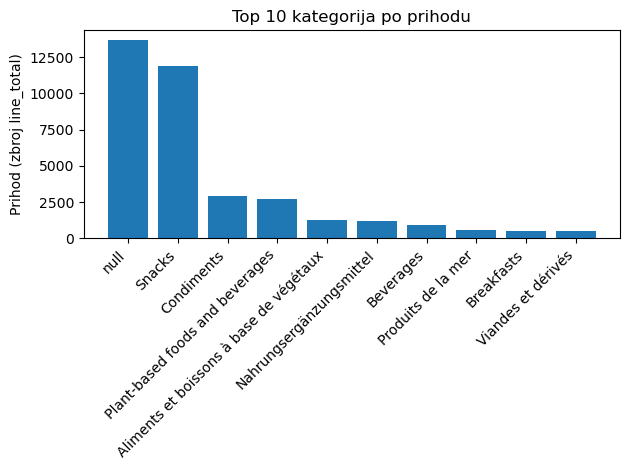

In [28]:
cat_rev = (
    sales.dropna(subset=["main_category"])
    .query("main_category != ''")
    .groupby("main_category", as_index=False)["line_total"]
    .sum()
    .sort_values("line_total", ascending=False)
    .head(10)
)

plt.figure()
plt.bar(cat_rev["main_category"], cat_rev["line_total"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 kategorija po prihodu")
plt.ylabel("Prihod (zbroj line_total)")
plt.tight_layout()
plt.show()


**Objašnjenje rezultata:**  
Grafički prikaz pokazuje da kategorije proizvoda nemaju ravnomjernu raspodjelu
prihoda, pri čemu se nekoliko kategorija izrazito ističe po ukupnom iznosu prodaje.
Vidljivo je da značajan dio prihoda dolazi iz kategorija s nepotpuno ili nekonzistentno
definiranim nazivima, što dodatno naglašava važnost kvalitete podataka pri analizi
prodajnih rezultata.
#### 2.5.3 Distribucija ukupne potrošnje po kupcu
U ovom dijelu rada analizira se raspodjela ukupne potrošnje među kupcima. Najprije se
za svakog kupca izračunava ukupna potrošnja zbrajanjem vrijednosti svih njegovih
stavki narudžbi. Dobivena vrijednost predstavlja ukupni iznos koji je pojedini kupac
potrošio u promatranom razdoblju.

Na temelju tih podataka izrađuje se histogram koji prikazuje distribuciju ukupne
potrošnje po kupcu. Ovakav prikaz omogućuje uvid u strukturu kupaca prema razini
potrošnje te identifikaciju tipičnih i ekstremnih obrazaca ponašanja.


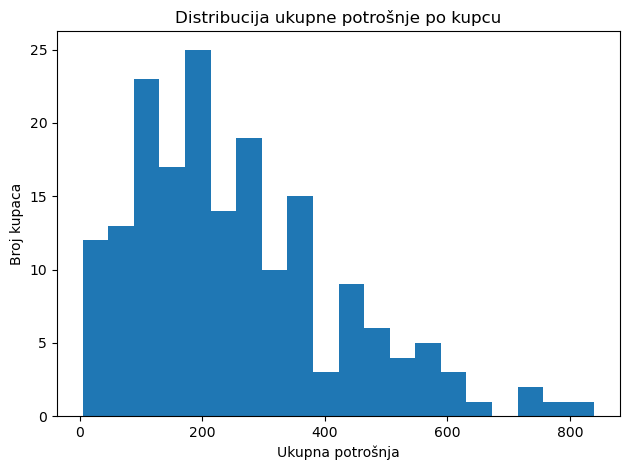

In [29]:
cust_spend = (
    sales.groupby("customer_id", as_index=False)["line_total"]
    .sum()
    .rename(columns={"line_total": "total_spend"})
)

plt.figure()
plt.hist(cust_spend["total_spend"], bins=20)
plt.title("Distribucija ukupne potrošnje po kupcu")
plt.xlabel("Ukupna potrošnja")
plt.ylabel("Broj kupaca")
plt.tight_layout()
plt.show()


**Objašnjenje rezultata:**  
Histogram pokazuje da većina kupaca ostvaruje relativno nisku do umjerenu ukupnu
potrošnju, dok manji broj kupaca značajno odskače s višim iznosima potrošnje. Takva
raspodjela upućuje na neravnomjernu strukturu potrošnje, gdje mali broj kupaca
generira nesrazmjerno velik dio ukupnog prihoda.
#### 2.5.4 Analiza prihoda kroz vrijeme (mjesečni trend)
U ovom dijelu rada analizira se kretanje prihoda kroz vrijeme na mjesečnoj razini.
Najprije se iz skupa prodajnih podataka uklanjaju zapisi bez definiranog datuma
narudžbe, nakon čega se datumi transformiraju u mjesečne vremenske oznake. Podaci se
zatim grupiraju prema mjesecima te se za svaki mjesec izračunava ukupni prihod.

Dobiveni rezultati prikazuju se linijskim grafom koji omogućuje praćenje promjena
prihoda kroz vrijeme i uočavanje potencijalnih trendova, oscilacija ili sezonalnih
obrazaca u prodaji.

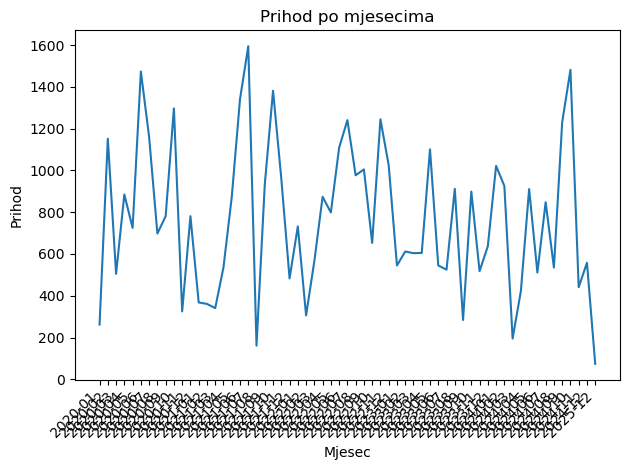

In [30]:
monthly_rev = (
    sales.dropna(subset=["order_date"])
    .assign(year_month=lambda df: df["order_date"].dt.to_period("M").astype(str))
    .groupby("year_month", as_index=False)["line_total"]
    .sum()
    .sort_values("year_month")
)

plt.figure()
plt.plot(monthly_rev["year_month"], monthly_rev["line_total"])
plt.xticks(rotation=45, ha="right")
plt.title("Prihod po mjesecima")
plt.xlabel("Mjesec")
plt.ylabel("Prihod")
plt.tight_layout()
plt.show()

**Objašnjenje rezultata:**  
Grafički prikaz pokazuje izražene oscilacije u mjesečnim prihodima, bez jasno
izraženog dugoročnog uzlaznog ili silaznog trenda. Takvo ponašanje upućuje na
nestabilnu ili sezonski uvjetovanu prodaju, što je karakteristično za podatke koji
kombiniraju sintetičke i stvarne izvore.
#### 2.5.5 Distribucija broja narudžbi po kupcu
U ovom dijelu rada analizira se učestalost kupovine po kupcu. Najprije se za svakog
kupca izračunava broj jedinstvenih narudžbi koje je ostvario, čime se dobiva mjera
frekvencije kupovine. Dobiveni podaci zatim se koriste za izradu histograma koji
prikazuje raspodjelu broja narudžbi među kupcima.

Ovakav prikaz omogućuje uvid u to koliko često kupci obavljaju kupovinu te pomaže u
identifikaciji dominantnih obrazaca ponašanja, poput jednokratnih kupaca ili manjih
skupina lojalnijih kupaca s većim brojem narudžbi.

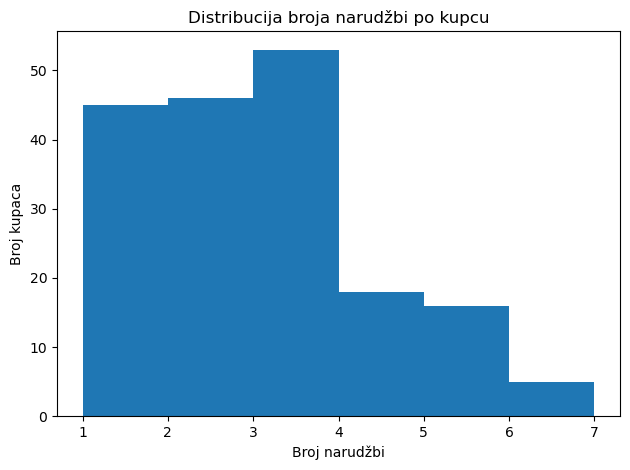

In [31]:
orders_per_customer = (
    sales.groupby("customer_id", as_index=False)["order_id"]
    .nunique()
    .rename(columns={"order_id": "orders_count"})
)

plt.figure()
plt.hist(orders_per_customer["orders_count"], bins=range(1, orders_per_customer["orders_count"].max() + 2))
plt.title("Distribucija broja narudžbi po kupcu")
plt.xlabel("Broj narudžbi")
plt.ylabel("Broj kupaca")
plt.tight_layout()
plt.show()


**Objašnjenje rezultata:**  
Histogram pokazuje da većina kupaca ostvaruje manji broj narudžbi, najčešće jednu do
tri, dok manji broj kupaca ima značajno veći broj narudžbi. Takva raspodjela upućuje
na postojanje jezgre lojalnih kupaca koji generiraju ponovljene kupovine, dok većinu
baze čine povremeni kupci.
#### 2.5.6 Najprodavaniji proizvodi prema ostvarenome prihodu
U ovom dijelu rada analizira se koji pojedinačni proizvodi ostvaruju najveći ukupni
prihod. Najprije se iz skupa prodajnih podataka uklanjaju zapisi bez naziva proizvoda,
nakon čega se podaci grupiraju prema nazivu proizvoda. Za svaki proizvod izračunava
se ukupni prihod zbrajanjem vrijednosti svih pripadajućih stavki narudžbi.

Dobiveni rezultati sortiraju se prema ostvarenome prihodu u silaznom redoslijedu te se
odabire deset proizvoda s najvećim ukupnim prihodom. Podaci se prikazuju horizontalnim
stupčastim grafom, čime se omogućuje pregledna usporedba najznačajnijih proizvoda.


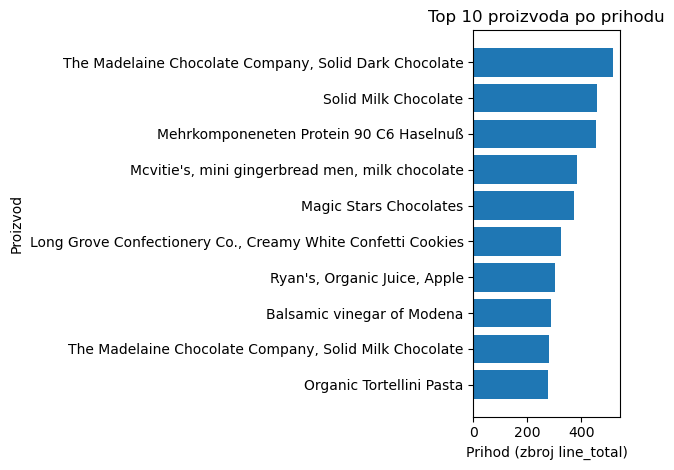

In [32]:
top_products = (
    sales.dropna(subset=["product_name"])
    .groupby("product_name", as_index=False)["line_total"]
    .sum()
    .sort_values("line_total", ascending=False)
    .head(10)
)

plt.figure()
plt.barh(top_products["product_name"], top_products["line_total"])
plt.title("Top 10 proizvoda po prihodu")
plt.xlabel("Prihod (zbroj line_total)")
plt.ylabel("Proizvod")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


**Objašnjenje rezultata:**  
Grafički prikaz pokazuje da mali broj proizvoda generira najveći dio prihoda, pri
čemu se među najuspješnijim proizvodima ističu čokoladni i konditorski proizvodi.
Takva koncentracija prihoda na ograničen broj proizvoda upućuje na izražen
“long-tail” efekt u prodaji.

## 3. Prikaz rada aplikacije

Rad aplikacije započinje učitavanjem podataka iz CSV datoteka, nakon čega slijedi njihovo objedinjavanje i čišćenje. Sustav zatim provodi analizu prodaje, izračunava ukupne prihode te identificira najvažnije kupce i proizvode. Na kraju se rezultati prikazuju grafički, čime se omogućuje jednostavna interpretacija dobivenih podataka.

Cijeli proces izveden je unutar jednog Jupyter Notebook dokumenta, što omogućuje ponovljivost analize i jednostavno proširenje funkcionalnosti.

Odabrani pristup s jednostavnim REST API-jem i relacijskom bazom podataka prikladan je za prototipske i edukativne primjene, gdje je naglasak na razumljivosti implementacije, a ne na visokoj razini skalabilnosti [6].

#### 3.1 Provjera dostupnosti i osnovnog rada REST API-ja
U ovom dijelu rada demonstrira se osnovni rad implementiranog REST API-ja putem
slanja HTTP zahtjeva prema odabranim endpointima. Za testiranje API-ja korištena je
Python biblioteka `requests`, čime se simulira ponašanje klijentske aplikacije.

Najprije se provjerava dostupnost API-ja pozivom zdravstvenog endpointa, nakon čega
se šalju zahtjevi za dohvat ograničenog broja zapisa iz tablica kupaca i prodaje.
Ovakav pristup omogućuje brzu provjeru ispravnosti rada API-ja i osnovne funkcionalnosti
paginacije.

In [33]:
import requests

print(requests.get("http://127.0.0.1:5000/health", timeout=5).json())
print(len(requests.get("http://127.0.0.1:5000/customers?limit=10", timeout=5).json()))
print(len(requests.get("http://127.0.0.1:5000/sales?limit=5", timeout=5).json()))

{'status': 'ok'}
10
5


**Objašnjenje rezultata:**  
Rezultati potvrđuju da je API dostupan i ispravno odgovara na zahtjeve. Zdravstveni
endpoint vraća status rada aplikacije, dok dohvat kupaca i prodaje vraća očekivan
broj zapisa u skladu s postavljenim parametrima ograničenja.
#### 3.2 Dohvat agregiranih statistika putem REST API-ja
U ovom dijelu rada demonstrira se dohvat agregiranih poslovnih statistika putem
REST API-ja. Pozivaju se endpointi koji vraćaju najprodavanije kategorije proizvoda
te kupce s najvećom ukupnom potrošnjom. Time se prikazuje mogućnost API-ja da nad
pohranjenim podacima izvršava složenije agregacijske upite i vraća sažete poslovne
metrike u JSON formatu.


In [34]:
import requests

print(requests.get("http://127.0.0.1:5000/stats/top-categories?limit=5").json())
print(requests.get("http://127.0.0.1:5000/stats/top-customers?limit=5").json())

[{'items': 358, 'main_category': 'Snacks', 'revenue': 11871.0}, {'items': 85, 'main_category': 'Condiments', 'revenue': 2916.0}, {'items': 97, 'main_category': 'Plant-based foods and beverages', 'revenue': 2693.0}, {'items': 40, 'main_category': 'Aliments et boissons à base de végétaux', 'revenue': 1237.0}, {'items': 36, 'main_category': 'Nahrungsergänzungsmittel', 'revenue': 1223.0}]
[{'customer_id': 143, 'first_name': 'Noble', 'last_name': 'Carlson', 'orders_count': 6, 'spend': 840.0}, {'customer_id': 6, 'first_name': 'Kirsten', 'last_name': 'Castillo', 'orders_count': 5, 'spend': 784.0}, {'customer_id': 127, 'first_name': 'Kylan', 'last_name': 'Pope', 'orders_count': 5, 'spend': 751.0}, {'customer_id': 195, 'first_name': 'Jonas', 'last_name': 'Mayo', 'orders_count': 6, 'spend': 746.0}, {'customer_id': 81, 'first_name': 'Illana', 'last_name': 'West', 'orders_count': 5, 'spend': 661.0}]


**Objašnjenje rezultata:**  
Rezultati prikazuju popis kategorija proizvoda s najvećim ostvarenim prihodom te
kupaca s najvećom ukupnom potrošnjom. Time se potvrđuje ispravnost implementacije
agregacijskih endpointa i njihova primjenjivost za poslovnu analizu.
#### 3.3 Provjera HTTP odgovora i formata API odgovora
U ovom dijelu rada provodi se dodatna provjera ispravnosti REST API-ja na razini HTTP
odgovora. Osim samog sadržaja odgovora, provjerava se i statusni kod te sirovi tekst
odgovora koji API vraća klijentu.

Ovakva provjera omogućuje potvrdu da endpoint ispravno odgovara standardima HTTP
protokola te da se podaci vraćaju u očekivanom JSON formatu, što je važno za
integraciju s vanjskim klijentskim aplikacijama.

In [35]:
import requests

r = requests.get("http://127.0.0.1:5000/stats/top-categories?limit=5")
print("status:", r.status_code)
print("text:", r.text[:500])

status: 200
text: [{"items":358,"main_category":"Snacks","revenue":11871.0},{"items":85,"main_category":"Condiments","revenue":2916.0},{"items":97,"main_category":"Plant-based foods and beverages","revenue":2693.0},{"items":40,"main_category":"Aliments et boissons \u00e0 base de v\u00e9g\u00e9taux","revenue":1237.0},{"items":36,"main_category":"Nahrungserg\u00e4nzungsmittel","revenue":1223.0}]



**Objašnjenje rezultata:**  
Dobiveni statusni kod 200 potvrđuje uspješnu obradu zahtjeva, dok ispis sirovog
odgovora pokazuje da API vraća podatke u JSON formatu s ispravno strukturiranim
atributima.

Nakon provjere endpointa za agregaciju po kategorijama, provodi se i provjera
endpointa koji vraća kupce s najvećom ukupnom potrošnjom. Time se potvrđuje da API
ispravno obrađuje i vraća složenije skupove podataka koji uključuju identifikatore
kupaca, osobne podatke i agregirane poslovne metrike.


In [36]:
r = requests.get("http://127.0.0.1:5000/stats/top-customers?limit=5")
print("status:", r.status_code)
print("text:", r.text[:500])

status: 200
text: [{"customer_id":143,"first_name":"Noble","last_name":"Carlson","orders_count":6,"spend":840.0},{"customer_id":6,"first_name":"Kirsten","last_name":"Castillo","orders_count":5,"spend":784.0},{"customer_id":127,"first_name":"Kylan","last_name":"Pope","orders_count":5,"spend":751.0},{"customer_id":195,"first_name":"Jonas","last_name":"Mayo","orders_count":6,"spend":746.0},{"customer_id":81,"first_name":"Illana","last_name":"West","orders_count":5,"spend":661.0}]



**Objašnjenje rezultata:**  
Dobiveni statusni kod 200 potvrđuje uspješnu obradu zahtjeva, dok sadržaj odgovora
pokazuje da API vraća strukturirane podatke o kupcima, uključujući broj narudžbi i
ukupnu potrošnju, u ispravnom JSON formatu.
#### 3.4 Demonstracija naprednih funkcionalnosti REST API-ja
U ovom dijelu rada demonstriraju se naprednije funkcionalnosti implementiranog REST
API-ja. Prikazani su primjeri dohvaćanja vremenskih statistika prodaje, rangiranja
kategorija prema broju prodanih stavki, dohvat stavki pojedine narudžbe te
pretraživanje proizvoda prema nazivu.

Ovi primjeri pokazuju fleksibilnost API-ja i njegovu sposobnost da nad istim skupom
podataka pruži različite analitičke poglede, ovisno o potrebama klijentske
aplikacije.


In [37]:
import requests

print(requests.get("http://127.0.0.1:5000/stats/revenue-by-month?limit=12").json())
print(requests.get("http://127.0.0.1:5000/stats/orders-by-month?limit=12").json())
print(requests.get("http://127.0.0.1:5000/stats/top-categories-by-items?limit=5").json())

print(requests.get("http://127.0.0.1:5000/orders/1/items").json()[:3])

print(requests.get("http://127.0.0.1:5000/products/search?q=chocolate&limit=5").json())

[{'revenue': 262.0, 'year_month': '2020-1-'}, {'revenue': 1297.0, 'year_month': '2020-10'}, {'revenue': 325.0, 'year_month': '2020-11'}, {'revenue': 781.0, 'year_month': '2020-12'}, {'revenue': 1152.0, 'year_month': '2020-2-'}, {'revenue': 505.0, 'year_month': '2020-3-'}, {'revenue': 885.0, 'year_month': '2020-4-'}, {'revenue': 725.0, 'year_month': '2020-5-'}, {'revenue': 1474.0, 'year_month': '2020-6-'}, {'revenue': 1160.0, 'year_month': '2020-7-'}, {'revenue': 698.0, 'year_month': '2020-8-'}, {'revenue': 781.0, 'year_month': '2020-9-'}]
[{'orders_count': 2, 'year_month': '2020-1-'}, {'orders_count': 10, 'year_month': '2020-10'}, {'orders_count': 3, 'year_month': '2020-11'}, {'orders_count': 8, 'year_month': '2020-12'}, {'orders_count': 13, 'year_month': '2020-2-'}, {'orders_count': 7, 'year_month': '2020-3-'}, {'orders_count': 7, 'year_month': '2020-4-'}, {'orders_count': 9, 'year_month': '2020-5-'}, {'orders_count': 14, 'year_month': '2020-6-'}, {'orders_count': 11, 'year_month': '2

**Objašnjenje rezultata:**  
Dobiveni rezultati prikazuju prihode i broj narudžbi po mjesecima, kategorije s
najvećim brojem prodanih stavki, detalje odabrane narudžbe te popis proizvoda koji
odgovaraju zadanom pojmu pretraživanja. Time se potvrđuje ispravnost i svestranost
implementiranih endpointa.

Dodatno se demonstriraju endpointi koji vraćaju sažete poslovne metrike te objedinjene
informacije o pojedinom kupcu. Prikazan je dohvat prosječne veličine košarice,
prosječne vrijednosti narudžbe te detaljan sažetak kupca koji uključuje broj
narudžbi, ukupnu potrošnju i najzastupljenije kategorije proizvoda.


In [38]:
import requests

print(requests.get("http://127.0.0.1:5000/stats/avg-basket-size").json())
print(requests.get("http://127.0.0.1:5000/stats/avg-order-value").json())

print(requests.get("http://127.0.0.1:5000/customers/1/summary").json())

{'avg_items_per_order': 9.49}
{'avg_order_value': 98.02}
{'country': 'South Africa', 'customer_id': 1, 'email': 'vel.sapien@aol.com', 'first_name': 'Erich', 'last_name': 'Rich', 'orders_count': 2, 'top_categories': [{'items': 1, 'main_category': 'Snacks', 'revenue': 28.0}], 'total_spend': 73.0}


**Objašnjenje rezultata:**  
Rezultati prikazuju prosječan broj stavki po narudžbi i prosječnu vrijednost
narudžbe, čime se dobiva uvid u tipično ponašanje kupaca. Sažetak kupca dodatno
prikazuje njegove osnovne podatke, broj narudžbi, ukupnu potrošnju te kategorije
proizvoda koje najviše doprinose njegovoj potrošnji.

## 4. Kritički osvrt

### 4.1 Prednosti rješenja

Glavna prednost implementiranog rješenja je njegova jednostavnost i preglednost. Korištenje Pandas biblioteke omogućuje efikasnu obradu većih količina podataka, dok Jupyter Notebook olakšava dokumentiranje i prezentaciju rezultata. Sustav je lako prilagodljiv i može se primijeniti na različite skupove prodajnih podataka.

### 4.2 Ograničenja i nedostaci

Ograničenje sustava očituje se u činjenici da se analiza temelji na statičkim podacima te ne podržava rad s podacima u stvarnom vremenu. Također, vizualizacije su osnovne te ne uključuju interaktivne elemente, što može ograničiti dubinsku analizu u složenijim scenarijima.

### 4.3 Moguća poboljšanja i budući rad

U budućem radu sustav bi se mogao proširiti dodavanjem interaktivnih vizualizacija, primjenom naprednijih statističkih metoda ili integracijom s bazama podataka i vanjskim API-jima. Također, moguće je implementirati prediktivne modele koji bi omogućili prognoziranje budućih trendova prodaje.

## 5. Zaključak

U ovom radu implementiran je sustav za analizu prodajnih podataka korištenjem programskog jezika Python. Ostvareni su postavljeni ciljevi rada, a dobiveni rezultati pokazuju kako se jednostavnim alatima može ostvariti značajan uvid u poslovne podatke. Rad potvrđuje praktičnu vrijednost analize podataka kao podrške donošenju informiranih odluka.

## 6. Literatura

[1] W. McKinney, “Data Structures for Statistical Computing in Python,” *Proceedings of the 9th Python in Science Conference*, pp. 56–61, 2010. doi: 10.25080/Majora-92bf1922-00a.

[2] J. D. Hunter, “Matplotlib: A 2D Graphics Environment,” *Computing in Science & Engineering*, vol. 9, no. 3, pp. 90–95, 2007. doi: 10.1109/MCSE.2007.55.

[3] H. Wickham, “Tidy Data,” *Journal of Statistical Software*, vol. 59, no. 10, pp. 1–23, 2014. doi: 10.18637/jss.v059.i10.

[4] E. F. Codd, “A Relational Model of Data for Large Shared Data Banks,” Communications of the ACM, vol. 13, no. 6, pp. 377–387, 1970. DOI: 10.1145/362384.362685

[5] R. T. Fielding, “Architectural Styles and the Design of Network-based Software Architectures,” Doctoral dissertation, University of California, Irvine, 2000. DOI: 10.26153/9781595930544

[6] C. Pautasso, O. Zimmermann, and F. Leymann, “RESTful Web Services vs. Big Web Services,” in Proceedings of the 17th International World Wide Web Conference (WWW 2008), pp. 805–814, 2008. DOI: 10.1145/1367497.1367606

[7] W. McKinney, Python for Data Analysis, O’Reilly Media, 2012. DOI: 10.5555/2396971

[8] C. Bizer, T. Heath, and T. Berners-Lee, “Linked Data – The Story So Far,” International Journal on Semantic Web and Information Systems, vol. 5, no. 3, pp. 1–22, 2009. DOI: 10.4018/jswis.2009081901